In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from osgeo import gdal
import glob
from pathlib import Path

In [5]:
cd /mnt/i/hyp3_downloads/desc_lower

/mnt/i/hyp3_downloads/desc_lower


In [6]:
# ls

In [7]:
paths = [Path(x) for x in glob.glob('./*/*dem_clip.tif')]

In [8]:
set([x.name for x in paths])

{'S1AA_20180615T173018_20180627T173019_VVP012_INT40_G_weF_34FD_dem_clip.tif'}

In [9]:
ds = gdal.Open(str(paths[0]), gdal.GA_ReadOnly)
ds = gdal.Open(str(paths[0]), gdal.GA_ReadOnly)
data = ds.GetRasterBand(1).ReadAsArray()
ds = None

In [10]:
data.shape

(6247, 7481)

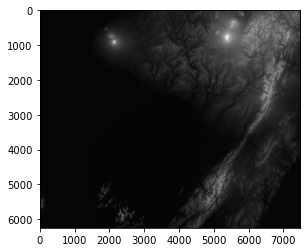

In [11]:
plt.imshow(data,cmap='gray')

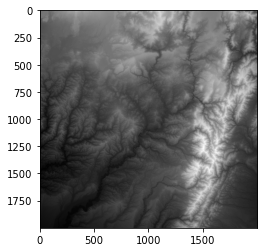

In [12]:
plt.imshow(data[1000:3000,5000:7000],cmap='gray')

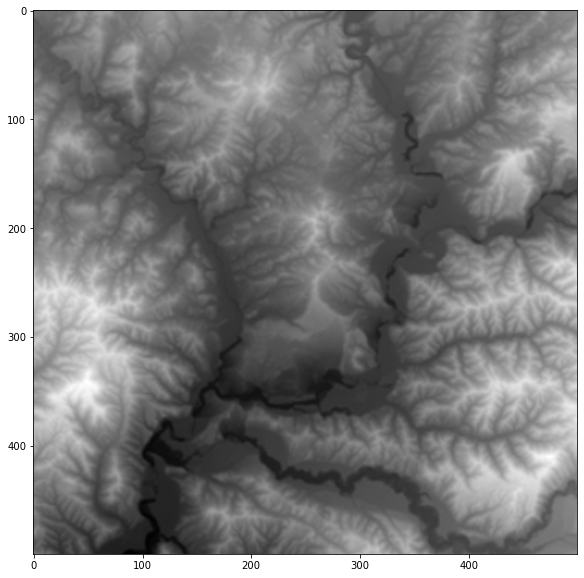

In [17]:
# 5900,1850 - 6200,2150
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(10,10))
plt.imshow(data,cmap='gray')
plt.imshow(data[1750:2250,5800:6300],cmap='gray')